## Question 3

Kuwahara filter :

One non-linear smoothing filter that works very well at maintaining edges and lowering noise in photos is the Kuwahara filter. In order to calculate the mean and variance for each region, a local window around each pixel is divided into multiple overlapping subregions, usually four. The mean intensity value from the area with the least variance is then used to replace the central pixel. This smoothes uniform areas while maintaining edges.

Edge Preservation: The Kuwahara filter, in contrast to other filters, is made to preserve edges by averaging certain regions according to their variance. While edges with higher variance are maintained, regions with lower variance—that is, less variation in pixel values—help to smooth the image.

Subregion Analysis: The filter creates overlapping regions (often four quadrants) inside a pixel's vicinity. The mean from the region with the least variance is substituted for the pixel value after the filter calculates the mean and variance for each subregion.

Non-Linear Behavior: The filter is non-linear because it chooses regions based on local variation rather than uniformly averaging pixel values.

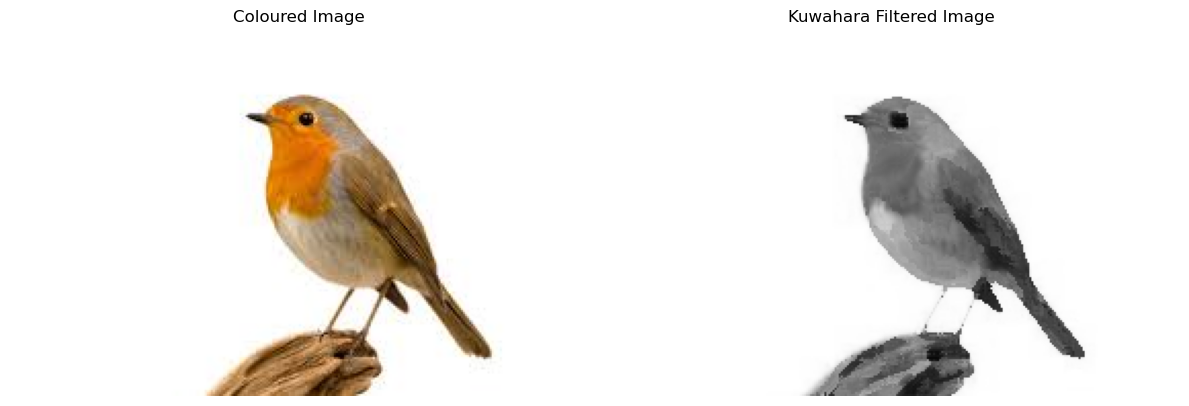

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def kuwahara_filter(image, kernel_size=5):
    # Converting image to float
    image = image.astype(np.float32)
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='edge')

    output_image = np.zeros_like(image)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            region = padded_image[y:y + kernel_size, x:x + kernel_size]
            q1 = region[:kernel_size//2, :kernel_size//2]
            q2 = region[:kernel_size//2, kernel_size//2:]
            q3 = region[kernel_size//2:, :kernel_size//2]
            q4 = region[kernel_size//2:, kernel_size//2:]

            # mean and variance 
            means = [np.mean(q) for q in [q1, q2, q3, q4]]
            variances = [np.var(q) for q in [q1, q2, q3, q4]]

            min_variance_index = np.argmin(variances)
            output_image[y, x] = means[min_variance_index]

    return np.clip(output_image, 0, 255).astype(np.uint8)

# Loading the image
image_path = 'IMAGE_HW2.jpeg'  
image = cv2.imread(image_path)

kuwahara_result = kuwahara_filter(image)

# Displaying the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Coloured Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(kuwahara_result, cv2.COLOR_BGR2RGB))
plt.title('Kuwahara Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
